<a href="https://colab.research.google.com/github/Valeriy1990/Data_science/blob/main/%D0%9F%D0%BE%D0%B8%D1%81%D0%BA%2C_%D1%81%D0%B1%D0%BE%D1%80_%D0%B8_%D0%BF%D0%B5%D1%80%D0%B2%D0%B8%D1%87%D0%BD%D0%B0%D1%8F_%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

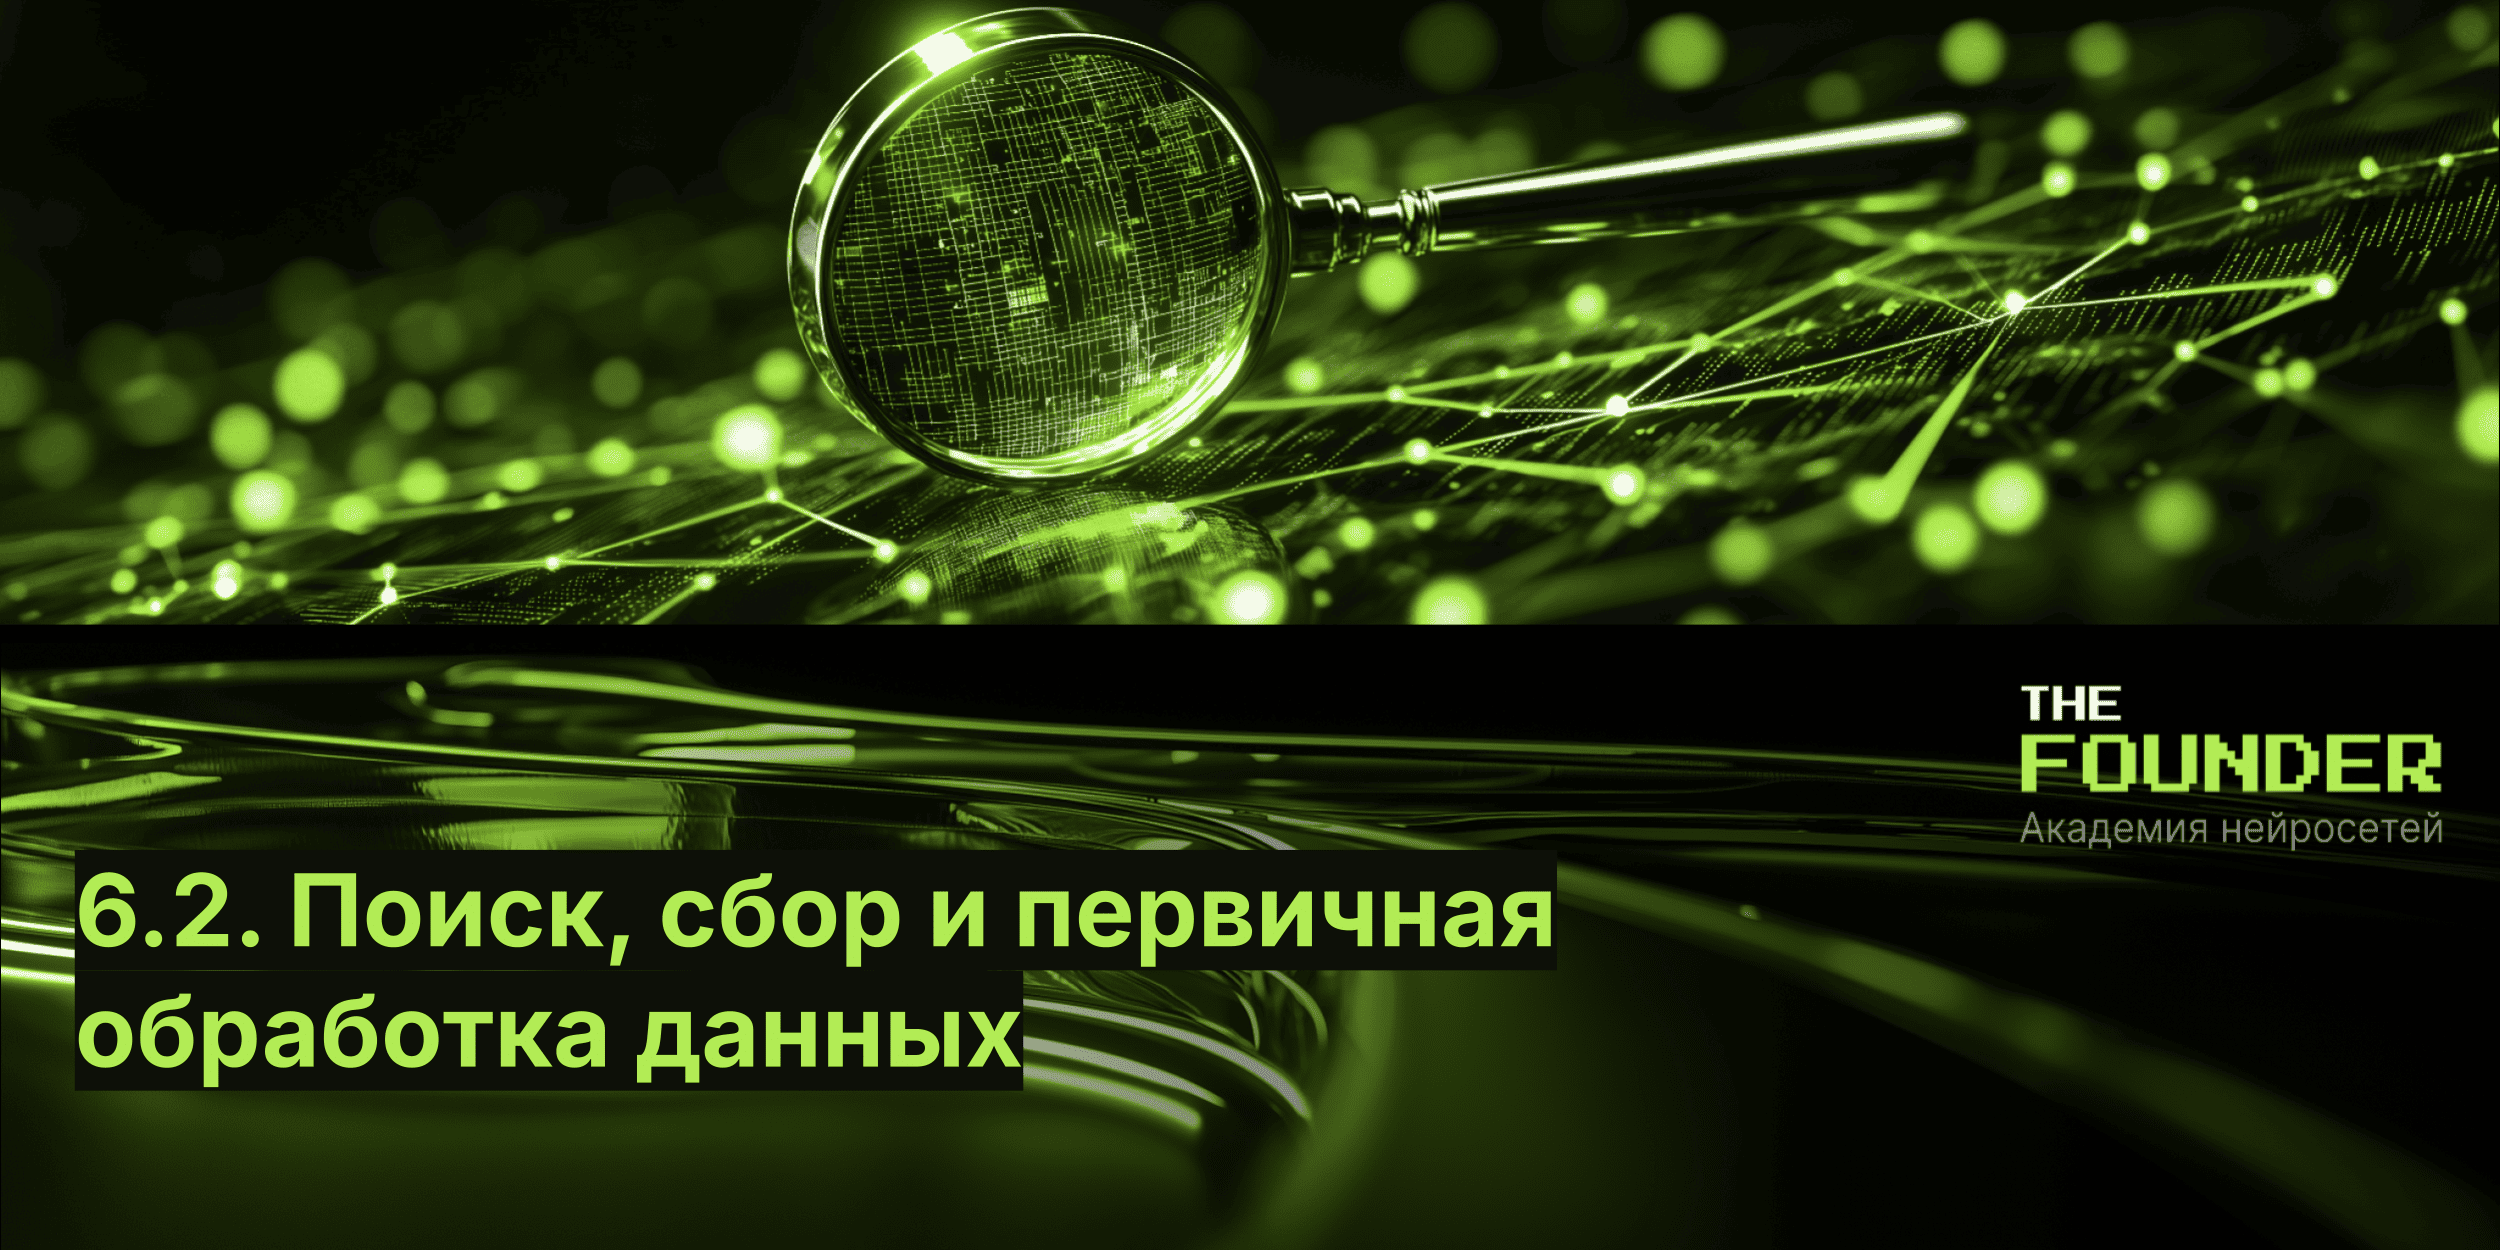

**Навигация по уроку**

1. [Введение в Data Science](https://colab.research.google.com/drive/1OzEE1Y-T_p8rqJHxAm7S8iO76Hx6Jox3)
2. Поиск, сбор и первичная обработка данных
3. [Домашняя работа](https://colab.research.google.com/drive/1mXLPa_PNtGYrRiYVf9F74rm9m6PYb6AU)

Для того чтобы быть исследователем данных, прежде всего нужны сами данные.
По сути дела, как исследователь данных вы будете тратить ошеломляюще огромную часть времени на сбор, очистку и преобразование данных. Естественно, в случае крайней необходимости всегда можно набрать данные вручную или поручить
волонтерам, если они есть, но обычно такая работа не лучшее применение
собственному времени. На данном практическом уроке мы посвятим время поиску, сбору и первичной обработки данных.



##Текстовые файлы

Текстовые файлы (.txt) — это, пожалуй, самый распространенный тип файлов.
Для Python текстовый файл — это последовательность строковых объектов.
Каждый строковый объект представляет собой одну строку текстового файла,
то есть последовательность символов, заканчивающуюся символом
новой строки (`\n`) или жестким переносом (намеренным разрывом строки).

Чтобы начать процесс чтения данных из файла, его предварительно следует открыть. То же самое необходимо сделать и перед записью информации в файл. Открыть файл в Python можно при помощи функции **open**.

Функция **open** принимает два аргумента. Первый из них указывает имя файла, который необходимо открыть. Второй аргумент также является текстовым и характеризует режим доступа (access mode) к файлу. Мы будем работать с тремя режимами доступа к файлу: на чтение (`r`), запись (`w`) и добавление (`a`). Можно указать и другие режимы, например двоичное чтение (`rb`), и двоичную запись (`wb`). Двоичное чтение и запись применяются в том, случае, если вы работаете не с текстовым файлом, а с бинарным, например, *.exe* или *.jpg*.

В качестве выходного значения функция open возвращает файловый объект (file object). При этом функция с аргументами обычно указывается справа от знака присваивания, а переменная, характеризующая файловый объект, – слева, как показано ниже.

In [ ]:
file = open("input.txt", "w") # мы открыли файл для записи, если он уже создан, то будет перезаписан
# Для работы с многострочным текстом, его необходимо заключить в тройные одинарные кавычки.

text = '''Это первая строка!\n
Это третья строка!\n
Это пятая строка!\n
Это седьмая строка!'''
# мы получили в переменную file дескриптор файла (ссылку на файл) и теперь по нему можем работать с файлом
file.write(text) # Записываем текст целиком в файл
file.close() # Закрываем файл

Теперь файл сохранен в рабочей директории проекта, чтобы узнать эту директорию, достаточно выполнить функцию **getcwd()** из пакета **os**:

In [ ]:
import os
print(os.getcwd())

/content


Теперь выведем содержание файла на экран и проанализируем его:

In [ ]:
file = open("input.txt", "r") # Теперь мы открываем файл для чтения

lines = file.readlines() # Извлекаем целиком текст из файла
print(f'Файл содержит {len(lines)} строк:')
for line in lines: # пробегаем по всем строчкам файла
    print(line)

# Закрываем файл
file.close()

Файл содержит 7 строк:
Это первая строка!



Это третья строка!



Это пятая строка!



Это седьмая строка!


Обратите внимание, что файл содержит 7 строк, а переменная *text* уместилась на 4 строчках. Почему так?

Еще раз повторим:

>Каждый строковый объект представляет собой одну строку текстового файла, то есть последовательность символов, заканчивающуюся символом новой строки (`\n`) или жестким переносом (намеренным разрывом строки).

Таким образом, каждая новая строка многострочной переменной *text* - это жесткий перенос, а символ новой строки (`\n`) тоже является новым переносом. Итого 4 строки с 3 жесткими переносами и 3 символами новой строки (`\n`) дают нам 7 строк.

После завершения чтения или записи файл должен быть
закрыт, для чего применяется соответствующий метод **close**.Поскольку легко можно забыть закрыть свои файл, следует всегда использовать его в блоке **with**, в конце которого файл будет закрыт автоматически:



In [ ]:
with open("input.txt", 'a') as file:  # Откроем файл в режиме "а" (append) - добавления
    file.write('\nЭто восьмая строчка')

# в этой точке file уже закрыт, поэтому не пытайтесь использовать его
# file.close()

Рассмотрим на примере различные методы чтения из файла:
* **read()** - прочитать целиком файла в одну строку
* **readline()** - прочитать из файла одну строку
* **readlines()** - прочитать все строки в список, каждая строка - элемент списка

In [ ]:
with open("input.txt", "r") as file:  # Открываем файл для чтения
    read_file = file.read() # Извлекаем целиком текст из файла как одну длинную строку
    print(read_file)

Это первая строка!

Это третья строка!

Это пятая строка!

Это седьмая строка!
Это восьмая строчка


In [ ]:
with open("input.txt", "r") as file:  # Открываем файл для чтения
    read_line = file.readline() # Извлекаем одну строку
    print(read_line) # в выводе появляется пустая строка за счет (\n)

    print(read_line.rstrip()) # удаляем перенос строки с помощью метода rstrip()

Это первая строка!

Это первая строка!


> Символ новой строки может быть удален после чтения из файла
при помощи метода **rstrip**. Этот метод, который может быть применен к  абсолютно любой строке, избавляет ее от всех примыкающих справа пробельных символов, в число которых входят пробел, символ табуляции и символ новой строки. Метод возвращает копию исходной строки без этих специальных символов в конце строки. Для удаления в начале слова существует метод **lstrip**, для удаления с двух сторон - **strip**.

In [ ]:
with open("input.txt", "r") as file:  # Открываем файл для чтения
    read_lines = file.readlines() # Извлекаем целиком текст из файла как список
    print(f'Файл содержит {len(read_lines)} строк:')
    print(read_lines)

Файл содержит 8 строк:
['Это первая строка!\n', '\n', 'Это третья строка!\n', '\n', 'Это пятая строка!\n', '\n', 'Это седьмая строка!\n', 'Это восьмая строчка']


## Веб-скрейпинг

Еще один способ получения данных состоит в скрейпинге или парсинге (как вам больше нравится) веб-страниц.
Выборку самих веб-страниц, сделать довольно легко, а получить из них значимую структурированную информацию не так просто.
Для получения данных из HTML мы применим библиотеку *BeautifulSoup4*, которая строит дерево из разнообразных элементов, расположенных на странице, и предоставляет простой интерфейс для доступа к ним. Для создания НТТР-запросов воспользуемся библиотекой *requests*.
Встроенный в Python анализатор HTML слишком требователен к соблюдению правил и, как следствие, не всегда справляется с HTML, который не вполне хорошо сформирован. По этой причине мы также установим другой анализатор под названием *html5lib*.

In [ ]:
!pip install beautifulsoup4 requests html5lib #установим недостающие библиотеки

In [ ]:
from bs4 import BeautifulSoup
import requests

# Получим с сайта RBС топ свежих новостей

url = ("https://rbc.ru/") # Зададим адрес новостного сайта для GET-запроса библиотеки requests
html = requests.get(url).text # Извлекаем из тела ответа текстовые данные
soup = BeautifulSoup(html, 'html5lib') # Применяем к данным анализатор html5lib

top_news = soup.find_all('a', class_='main__feed__link') # В дереве данных ищем все гиперссылки 'a' с классом 'main__feed__link'
filteredNews = []

for data in top_news: # Перебираем все найденные ссылки на новости
    if data.find('span', class_='main__feed__title') is not None: # внутри ссылок ищем тег 'span' с классом 'main__feed__title'
        filteredNews.append(data.text.strip()) # Извлекаем текст, очищенный от пробельных символов


for i, news in enumerate(filteredNews): # enumerate - возвращает кортеж из индекса и самого значения: (index, filteredNews[index] )
    print(i+1, news)


1 В Дагестане арестовали семерых человек за беспорядки в аэропорту
2 Мишустин сообщил о росте ВВП на 5% в сентябре и на 2,8% за девять месяцев
3 Ущерб от беспорядков в аэропорту Махачкалы оценили минимум в ₽285 млн
4 VK завершила редомициляцию. Что ждать от компании дальше
5 Глава Carlsberg обвинил Россию в краже бизнеса
6 Израиль сообщил об ожесточенных боях «в глубине» сектора Газа
7 «Росатом» словами «вопросов нет» ответил на критику Лукашенко по БелАЭС
8 Кремль исключил «свободный выход» западных компаний из России
9 ФСБ сообщила о задержании воевавшего на стороне ВСУ россиянина
10 Патрушев заявил об изменении роли параллельного импорта в экономике
11 Силовики предупредили о проведении в Москве учений с бронетехникой
12 Война Израиля и ХАМАС. Онлайн
13 Военная операция на Украине. Онлайн
14 Где выгоднее купить квартиру для инвестиций: в России или за рубежом
15 Как продавать зумерам: история провала и возрождения Abercrombie & Fitch


###Анализ web-страницы

**Как же нам выяснить, из каких узлов состоит веб страница?**

Для этого в браузере нажмите правой кнопкой мышкой по тому объекту который хотите исследовать и выберете пункт меню "Просмотреть код". Как видно на скринкасте ниже, откроется, так называемая панель разработчика:

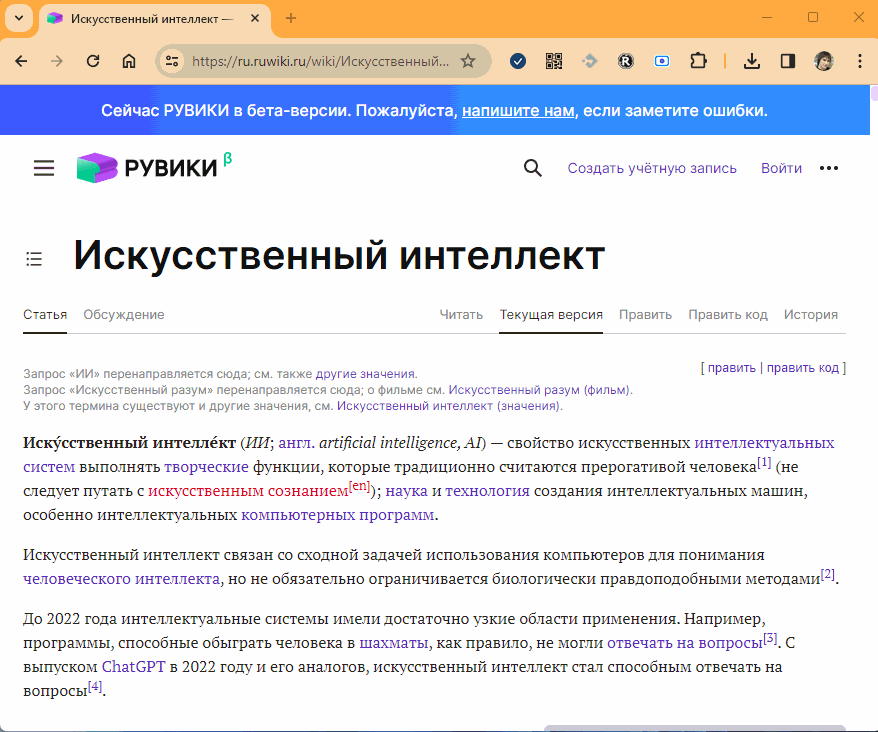

На вкладке "Элементы" панели разработчиков содержится DOM модель документа, примерно такую же модель создает BeautifulSoup. Почему почти? Потому, что в качестве второго параметра в `BeautifulSoup(html, 'html5lib')` мы передаем какой парсер хотим применить. Каждый из парсеров имеет свои особенности. Но на наш взгляд `html5lib` способен покрыть задачи, с которыми вам придется столкнуться в профессии разработчика ИИ.



> **DOM (Document Object Model - объектная модель документа)** - это независящий от платформы и языка программный интерфейс, позволяющий программам и скриптам получить доступ к содержимому HTML-, XHTML- и XML-документов, а также изменять содержимое, структуру и оформление таких документов.

>Модель DOM не накладывает ограничений на структуру документа. Любой документ известной структуры с помощью DOM может быть представлен в виде дерева узлов, каждый узел которого представляет собой элемент, атрибут, текстовый, графический или любой другой объект. Узлы связаны между собой отношениями «родительский-дочерний».

>Изначально различные браузеры имели собственные модели документов (DOM), несовместимые с остальными. Для обеспечения взаимной и обратной совместимости специалисты международного консорциума W3C классифицировали эту модель по уровням, для каждого из которых была создана своя спецификация. Все эти спецификации объединены в общую группу, носящую название W3C DOM.

**Что надо знать в HTML, чтобы парсить страницы?**

На самом деле, чтобы вытаскивать данные из HTML страниц, не нужно изучать HTML, достаточно усвоить следующие базовые моменты:
1. Узлы в DOM объекте - теги
2. Теги обычно встречаются парами и заключены в угловые скобки: `<p> </p>`
3. За счет парности тегов, они могут быть вложены друг в друга:
    ```
    <div>
        <p>
            <div></div>
        </p>
    </div>
    ```
4. Вложенные теги "чилдрены" (children, дочерние элементы), на уровень выше "родитель" (parent).
5. Внутри пары тегов могут быть другие теги или текст (задача исследователя данных, чаще всего заключается в извлечении этого текста):
  `<p> Привет! </p>`
6. Бывают теги без пары. Грустно наверно им :) Их еще называют одиночные или пустые. Их не много, самые частые из них: `<img>`, `<input>`, `<link>`
7. Внутри открывающего тега могут быть аттрибуты: `<div class='red' id='book'>`  
8. У закрывающего тега аттрибутов быть не может: `</div>`
9. Самые частые аттрибуты:
* `class` (селектор, идентификатор класса) - помогает связать тег сайта с каскадной таблицей стилей (стили для сайта хранятся в отдельном файле, где описано, как он будет отображаться: размер шрифта, цвет шрифта, цвет заднего фона и т.д.)
* `id` (селектор, идентификатор) - помогает "пометить" тег и обращаться к тегу из скрипта (динамическая часть сайта управляется скриптами на языке Java Script, который обращается к тегу по его идентификатору).

Проведем анализ страницы в русской версии википедии о ИИ:

In [ ]:
from bs4 import BeautifulSoup
import requests

# Добавим заголовок, чтобы Рувики воспринимала наш запрос как от браузера
headers = { "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:102.0) Gecko/20100101 Firefox/102.0" }

url = ("https://ru.ruwiki.ru/wiki/Искусственный_интеллект") # Зададим адрес сайта для GET-запроса библиотеки requests
html = requests.get(url, headers=headers).text # Извлекаем из тела ответа текстовые данные
soup = BeautifulSoup(html, 'html5lib') # Применяем к данным анализатор html5lib

Исследуем заголовок страницы:

In [ ]:
#Выводим заголовок сайта (тег title)
soup.title

<title>Искусственный интеллект — РУВИКИ</title>

In [ ]:
#Выводим имя тега заголовка
soup.title.name

'title'

In [ ]:
#Выводим текст заголовка (текст содержится между парными тегами <title>)
soup.title.text

'Искусственный интеллект — РУВИКИ'

In [ ]:
#Выводим текст заголовка (другой способ)
soup.title.string

'Искусственный интеллект — РУВИКИ'

Исследуем абзацы первого уровня `h1`:

In [ ]:
# Мы обращаемся к первому найденному тегу h1 (тег называется "заголовок первого уровня"), для перебора всех тегов нужно использовать find_all
soup.h1

<h1 class="firstHeading mw-first-heading" id="firstHeading"><span class="mw-page-title-main">Искусственный интеллект</span></h1>

In [ ]:
# Получение текста внутри тега
soup.h1.string

'Искусственный интеллект'

In [ ]:
# Теги могут содержать атрибуты, получим список атрибутов тега h1
soup.h1.attrs

{'id': 'firstHeading', 'class': ['firstHeading', 'mw-first-heading']}

In [ ]:
#Теперь мы можем обратиться к атрибуту по имени class
soup.h1['class']

['firstHeading', 'mw-first-heading']

In [ ]:
#Теперь мы можем обратиться к атрибуту по имени id
soup.h1['id']

'firstHeading'

In [ ]:
# Выводим текстовые значения всех заголовков второго уровня h2:
for h2 in soup.find_all('h2'):
    print(h2.text)

Содержание
Происхождение и смысл термина[править | править код]
Предпосылки развития науки искусственного интеллекта[править | править код]
Подходы и направления[править | править код]
Современный искусственный интеллект[править | править код]
Области применения искусственного интеллекта[править | править код]
Связь с другими науками и явлениями культуры[править | править код]
Правовые вопросы[править | править код]
См. также[править | править код]
Примечания[править | править код]
Литература[править | править код]
Ссылки[править | править код]


Вы можете перемещаться по дереву DOM, используя обычные имена тегов. Объединение этих имен тегов в цепочку поможет вам глубже перемещаться по дереву. Например, вы можете получить первую ссылку в первом абзаце данной страницы Википедии, используя `soup.p.a`.
Доступ ко всем ссылкам в первом абзаце можно получить, используя `soup.p.find_all('a')`.

Вы также можете получить доступ ко всем дочерним элементам тега в виде списка, используя `.contents`. Чтобы получить дочерние элементы по определенному индексу, вы можете использовать `.contents[index]`. Вы также можете перебирать дочерние элементы тега, используя `.children` атрибут.

Оба `.children` и `.contents` полезны только тогда, когда вы хотите получить доступ к прямым потомкам или потомкам тега первого уровня. Чтобы получить всех потомков, вы можете использовать `.descendants` атрибут.



Основной блок с содержимым страницы находится в классе "mw-body-content", с ним и будем экспериментировать:

In [ ]:
content = soup.find("div", class_="mw-body-content") # В теге с таким классом содержится

In [ ]:
# получим дочерние элементы первого абзаца
print(content.p.contents)

[<b>Иску́сственный интелле́кт</b>, ' (', <i>ИИ</i>, '; ', <a href="/wiki/%D0%90%D0%BD%D0%B3%D0%BB%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%8F%D0%B7%D1%8B%D0%BA" title="Английский язык">англ.</a>, '\xa0', <span lang="en" style="font-style:italic;">artificial intelligence, AI</span>, ')\xa0— свойство искусственных ', <a href="/wiki/%D0%98%D0%BD%D1%82%D0%B5%D0%BB%D0%BB%D0%B5%D0%BA%D1%82%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D0%B0" title="Интеллектуальная система">интеллектуальных систем</a>, ' выполнять ', <a href="/wiki/%D0%A2%D0%B2%D0%BE%D1%80%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%BE" title="Творчество">творческие</a>, ' функции, которые традиционно считаются прерогативой человека', <sup class="reference" id="cite_ref-RAAI_1-0"><a href="#cite_note-RAAI-1">[1]</a></sup>, ' (не следует путать с ', <span data-interwiki-article="Artificial consciousness" data-interwiki-lang="en"><a class="new" href="/w/index.php?title=%D0%98%D1%81%D0%BA%D1%83%D1%81%D1%81%D

In [ ]:
#получим дочерние элементы другим методом
print(content.p.children)

Как видно выше, значение потомков получено в виде итератора и перебирать их нужно циклом:

In [ ]:
for child in content.p.children:
    print(child.text)

Иску́сственный интелле́кт
 (
ИИ
; 
англ.
 
artificial intelligence, AI
) — свойство искусственных 
интеллектуальных систем
 выполнять 
творческие
 функции, которые традиционно считаются прерогативой человека
[1]
 (не следует путать с 
искусственным сознанием
[en]
); 
наука
 и 
технология
 создания интеллектуальных машин, особенно интеллектуальных 
компьютерных программ
.



### Лирическое отступление

Мы считаем важно обсудить то, что мы встретили в предыдущем примере, а именно **итератор списков**. Почему это так важно, потому что этот вопрос часто задаётся на собеседованиях и ставит в тупик соискателей.

Во многих статьях и книгах пишут про то, что цикл *for* позволяет перебирать объекты коллекций. Это правда. Однако часто из внимания упускают то, как именно он это делает. А ведь это фундаментально важно для понимания нашей темы.

На самом деле цикл *for* взаимодействует не с самим целевым объектом перебора, а с его итератором! В нашем случае — с итератором списка.
То есть цикл как бы запрашивает у объекта правило его перебора. Если объект в состоянии вернуть это правило, то объект называется итерируемым и его можно перебирать. Если же такого правила объект не возвращает, то будет вызвана ошибка, т.к. объект невозможно перебрать.

Весь фокус в том, что итерируемый объект в случае успеха возвращает объект итератор.

Как же цикл *for* получает объект-итератор от целевого итерируемого объекта?

С помощью неявного вызова встроенной функции *iter*, в которую в качестве аргумента он передаёт как раз этот самый целевой итерируемый объект. И если в результате будет получен некий объект, то дальнейшая работа будет производиться уже с ним. Давайте посмотрим, что мы получим в качестве результата, если передадим список в метод iter:

In [ ]:
tumb = ["камень", "ножницы", "бумага", "колодец"]

# получаем итератор для итерируемого объекта
it = iter(tumb)
print(it)


**Видите?**

Мы получили объект типа `list_iterator` - это то самое правило перебора.
После успешного получения итератора цикл *for* начинает взаимодействовать с ним простым запросом следующего значения, пока эти значения не будут исчерпаны.

**Так что же это за запрос?**

С помощью встроенной функции **next**, аргументом которой является объект-итератор, полученный на предыдущем шаге, цикл *for* запрашивает следующее значение.

In [ ]:
next_val = next(it)
print("Очередное значение:", next_val)

Очередное значение: камень


In [ ]:
next_val = next(it)
print("Очередное значение:", next_val)

Очередное значение: ножницы


In [ ]:
next_val = next(it)
print("Очередное значение:", next_val)

Очередное значение: бумага


In [ ]:
next_val = next(it)
print("Очередное значение:", next_val)

Очередное значение: колодец


In [ ]:
next_val = next(it)
print("Очередное значение:", next_val)

StopIteration: ignored


Результатом этого в штатном случае будет получение очередного значения. Такая процедура будет повторяться многократно до тех пор, пока цикл *for* не получит сообщение о том, что все значения уже закончились.

**Что это за сообщение?**

Это  ошибка *StopIteration*. Обработку ошибок и генерацию исключений мы рассмотрим в следующих уроках, пока что мы запишем, как выглядит эта схема работы цикла *for* через *while*:

In [ ]:

tumb = ["камень", "ножницы", "бумага", "колодец"]

# получаем итератор для итерируемого объекта
it = iter(tumb)
# мы оборачиваем наш код в обработчик исключений try
# try - дословно переводится как "пытаться":
try:
    while True:
        next_val = next(it)
        print("Очередное значение:", next_val)

# блок, который выполнится, если возникнет ошибка "StopIteration"
except StopIteration:
    # явно напечатаем сообщение об окончании итерации,
    # хотя цикл for этого не делает и ошибка просто подавляется
    print("Итерация закончена")
print("Программа завершена")

Очередное значение: камень
Очередное значение: ножницы
Очередное значение: бумага
Очередное значение: колодец
Итерация закончена
Программа завершена


### Анализируем страницу дальше

In [ ]:
from bs4 import BeautifulSoup
import requests

# Добавим заголовок, чтобы Рувики воспринимала наш запрос как от браузера
headers = { "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:102.0) Gecko/20100101 Firefox/102.0" }

url = ("https://ru.ruwiki.ru/wiki/Искусственный_интеллект") # Зададим адрес сайта для GET-запроса библиотеки requests
html = requests.get(url, headers=headers).text # Извлекаем из тела ответа текстовые данные
soup = BeautifulSoup(html, 'html5lib') # Применяем к данным анализатор html5lib

content = soup.find("div", class_="mw-body-content") # В теге с таким классом содержится

In [ ]:
print(content.parent.div)

<div class="yenisey-body-before-content">
					
						<div class="noprint" id="siteSub">Материал из РУВИКИ — свободной энциклопедии</div>
					</div>


Вы также можете получить доступ к родительскому элементу, используя *.parent* атрибут. Аналогичным образом вы можете получить доступ ко всем предкам элемента, используя *.parents* атрибут.

Родителем `<html>` тега верхнего уровня является BeautifulSoup сам объект, а его родителем — **None**.

>None - тип данных, который называется NoneType. Его единственное возможное значение – None. Обычно None используется, когда вы хотите создать переменную, но пока не хотите присваивать ей какое-либо конкретное значение. Его часто интерпретируют как "значение неопределено"

Вы можете получить доступ к предыдущему и следующему элементу, используя атрибуты *.previous_sibling* и *.next_sibling*.

Чтобы два элемента были братьями и сестрами, у них должен быть один и тот же родительский элемент. Это означает, что у первого дочернего элемента не будет предыдущего родственного элемента. Аналогично, у последнего дочернего элемента не будет следующего родственного элемента. На реальных веб-страницах предыдущий и следующий элементы элемента, скорее всего, будут символом новой строки.

Вы также можете перебирать всех дочерних элементов элемента, используя *.previous_siblings* и *.next_siblings*.

Вы можете перейти к элементу, который идет сразу после текущего элемента, используя *.next_element* атрибут. Чтобы получить доступ к элементу, который находится непосредственно перед текущим элементом, используйте атрибут *.previous_element*.

Аналогичным образом вы можете перебирать все элементы, которые идут до и после текущего элемента, используя *.previous_elements* и *.next_elements* соответственно.

In [ ]:
tag_li = content.contents[0].find('li')
# найдём элемент li - тег "элемент списка"
print(tag_li)
# запросом следующий элемент
print(tag_li.next_elements)

<li>Научное направление, в рамках которого ставятся и решаются задачи аппаратного или программного моделирования тех видов человеческой деятельности, которые традиционно считаются интеллектуальными<sup class="reference" id="cite_ref-RAAI_1-1"><a href="#cite_note-RAAI-1">[1]</a></sup>.</li>
<generator object PageElement.next_elements at 0x7889dcc5ace0>


И снова мы получили какой-то *generator object*. **Что это?**

In [ ]:
# получить значение можно с помощью next
print(next(tag_li.next_elements))

Научное направление, в рамках которого ставятся и решаются задачи аппаратного или программного моделирования тех видов человеческой деятельности, которые традиционно считаются интеллектуальными


###Еще одно лирическое отступление

Раз мы в примере выше смогли получить значение генератора с помощью next(), значит можно предположить, что это итератор!

**Так что же такое generator-object?**

Рассмотрим 2 функции:

In [ ]:
def func_1():
  print("Сейчас отдам число")
  return 1


def func_2():
  print("Сейчас отдам число")
  yield 1

Функция может содержать не только оператор возврата **return**, но и **yield**, который тоже возвращает значение, но по-другому:

In [ ]:
print(func_1())
print(func_2())

Сейчас отдам число
1
<generator object func_2 at 0x7889dcc5aa40>


В первом случае всё понятно, так что же нам вернула вторая функция?

Дело в том, что интерпретатор при исполнении самой функции в случае, если в ней присутствует ключевое слово `yield`, всегда возвращает объект-генератор (generator-object).

Для получения значения генератора, нужно вызвать знакомую нам функцию *next()*:

In [ ]:
next(func_2())

Сейчас отдам число


1

Чтобы разобраться в различиях между генераторами и функциями, давайте сначала разберем разницу между ключевыми словами *return* и *yield*.

Когда интерпретатор доходит до ключевого слова *return*, выполнение функции полностью прекращается. Но когда он доходит до ключевого слова *yield*, программа приостанавливает выполнение функции и возвращает значение в итерируемый объект. После этого интерпретатор возвращается к генератору, чтобы повторить процесс для нового значения.

Мы уже видели генераторы списков, изменим квадратные скобки на круглые и получим генератор объекта:

In [ ]:

mylist = [1, 3, 6, 10]
a = (x**2 for x in mylist)
print(a)

<generator object <genexpr> at 0x7889dcc5adc0>


In [ ]:
print(next(a))
print(next(a))
print(next(a))
print(next(a))

1
9
36
100


Вызовем следующую итерацию и получим знакомую нам ошибку:

In [ ]:
print(next(a))

StopIteration: ignored

Зачем нам вообще от удобных списков переходить к "страшным" генераторам? А вот зачем. Список сразу удерживает в памяти определенное число значений. А генератор в каждый отдельный момент удерживает только одно значение — то, которое он возвращает. Вот почему генераторы требуют куда меньше памяти. Когда мы применяем генератор, нам также не приходится ждать вычисления всех значений.

Обратите внимание, что генератор может содержать больше одного ключевого слова *yield*. Примерно так же, как функция может иметь больше одного ключевого слова *return*:

In [ ]:

# функция генератор
def my_gen(x):
    while(x>0):
        if x%2==0: # находим остаток от деления на 2
            yield 'Even' # чётное число
        else:
            yield 'Odd'  # нечётное число
        x-=1 # уменьшаем на 1

for i in my_gen(7): #вспоминаем как работает for
    print(i)

Odd
Even
Odd
Even
Odd
Even
Odd


In [ ]:
# Проверка логики работы цикла for

print(next(iter(my_gen(7))))

Odd


##Используем API

Большинство интерфейсов API требует от пользователя сначала аутентифицировать себя прежде, чем начать ими пользоваться. Поэтому мы сначала обратимся к программному интерфейсу GitHub, с помощью которого можно делать некоторые простые вещи без аутентификации:

In [ ]:
!pip install python-dateutil # устанавливаем библиотеку для работы с датами

In [ ]:
import requests, json # Импортируем библиотеку requests для HTTP-запросов и библиотеку json - для работы в формате JSON
from dateutil.parser import parse # Импортируем парсер дат, позволяет даты из текстового формата преобразовать в формат datetime

github_user = "realpython" # Имя пользователя на гитхабе, можете использовать свое

endpoint = f"https://api.github.com/users/{github_user}/repos"
repos = json.loads(requests.get(endpoint).text)

repositories = sorted(repos, key=lambda r: r["created_at"], reverse=True) [:5]

for repo in repositories: #
    print('Репозиторий', repo['name'], 'создан', parse(repo['created_at']).strftime("%d.%m.%Y"), ' - ', repo['language'])

Репозиторий data-repos создан 20.01.2023  -  Python
Репозиторий data-version-control создан 21.07.2020  -  Python
Репозиторий django-receipts создан 02.04.2020  -  Python
Репозиторий codetiming создан 28.07.2019  -  Python
Репозиторий author-tools создан 29.10.2018  -  TypeScript


Если мы хотим получить список дат всех репозиториев, то можно воспользоваться генератором списков:

In [ ]:
dates = [parse(repo["created_at"]) for repo in repos] # генератор списков, краткая запись цикла, результат записывается в виде списка в переменную dates
print(dates)

[datetime.datetime(2014, 3, 26, 5, 6, 57, tzinfo=tzlocal()), datetime.datetime(2015, 4, 6, 17, 54, 46, tzinfo=tzlocal()), datetime.datetime(2017, 8, 28, 2, 24, 35, tzinfo=tzlocal()), datetime.datetime(2018, 10, 29, 22, 37, 28, tzinfo=tzlocal()), datetime.datetime(2016, 12, 28, 1, 40, 8, tzinfo=tzlocal()), datetime.datetime(2017, 9, 20, 14, 14, 30, tzinfo=tzlocal()), datetime.datetime(2014, 3, 10, 18, 9, 48, tzinfo=tzlocal()), datetime.datetime(2014, 3, 10, 18, 14, 30, tzinfo=tzlocal()), datetime.datetime(2014, 2, 26, 15, 55, 43, tzinfo=tzlocal()), datetime.datetime(2019, 7, 28, 18, 54, 10, tzinfo=tzlocal()), datetime.datetime(2015, 1, 21, 16, 28, 25, tzinfo=tzlocal()), datetime.datetime(2015, 6, 29, 4, 21, 48, tzinfo=tzlocal()), datetime.datetime(2023, 1, 20, 14, 56, 24, tzinfo=tzlocal()), datetime.datetime(2020, 7, 21, 13, 22, 47, tzinfo=tzlocal()), datetime.datetime(2014, 12, 3, 16, 24, 4, tzinfo=tzlocal()), datetime.datetime(2014, 6, 3, 17, 1, 36, tzinfo=tzlocal()), datetime.datetim

Т.е. цикл *for* пробегается по элементам списка `repos` и для каждого элемента (который является словарем) берет ключ `created_at` и для него выполняет функцию *parse*. Результат каждой итерации добавляется в список `dates`.

Пример можно переписать в полной форме:
```
dates = []
for repo in repos:
    dates.append(parse(repo["created_at"]))
```

Теперь даты преобразованы в формат библиотеки datetime и с ними можно работать, например, вывести в нужном формате:

In [ ]:
print('Форматируем дату:', dates[0].strftime("%d.%m.%Y"))
print('Форматируем дату в другой формат:', dates[0].strftime("%H:%M:%S %b %d %Y"))
print('Выводим день:', dates[0].day)
print('Выводим месяц:', dates[0].month)
print('Выводим год:', dates[0].year)
print('Выводим час:', dates[0].hour)
print('Выводим минуту:', dates[0].minute)
print('Выводим секунду:', dates[0].second)
print('Выводим микросекунду:', dates[0].microsecond)


Форматируем дату: 26.03.2014
Форматируем дату в другой формат: 05:06:57 Mar 26 2014
Выводим день: 26
Выводим месяц: 3
Выводим год: 2014
Выводим час: 5
Выводим минуту: 6
Выводим секунду: 57
Выводим микросекунду: 0


Если вам нужны данные с определенного веб-сайта, то все подробности следует
искать в разделе для разработчиков или разделе API веб-сайта и попытаться отыскать библиотеку в Интернете по запросу **python <имя_сайта> api**.

Хороший список API, которые также имеют и обертки в виде библиотек Python представлены в репозитории [Real Python на GitHub](https://github.com/realpython/list-of-python-api-wrappers). Настоятельно рекомендуем с ним ознакомиться.

И если вы не можете отыскать то, что вам нужно, то всегда есть веб-скрейпинг, как "последняя возможность" исследователя данных.




На этом практическая часть урока завершена. Пора переходить к [домашней работе](https://colab.research.google.com/drive/1mXLPa_PNtGYrRiYVf9F74rm9m6PYb6AU).